In [ ]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Consctructing vector $x$ and measruments $b = Ax$

In [ ]:
# Vector of interest
n = 20
m = 30
x = np.zeros((m,1))
x[np.random.randint(0,m,3)] = np.random.randn(3,1)*.3

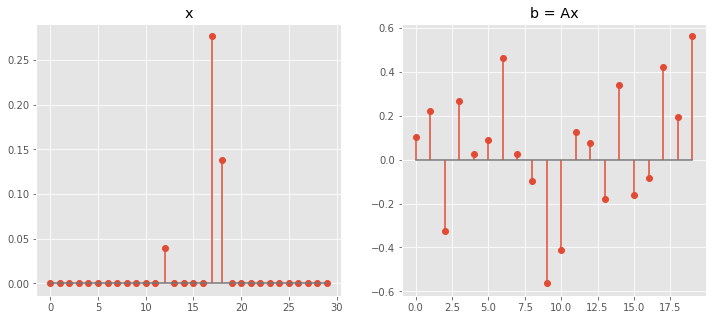

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.stem(x,use_line_collection=True)
plt.title('x')

# Measurement2
A = np.random.randn(n,m)
b = A.dot(x)
plt.subplot(1,2,2)
plt.stem(b,use_line_collection=True)
plt.title('b = Ax')
plt.show()

Finding solution with minimal $\|x\|_2$ norm

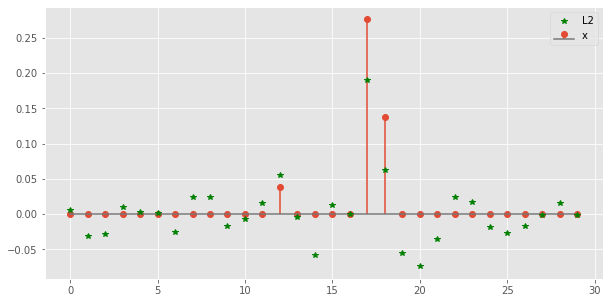

In [8]:
x_hat = A.T.dot(np.linalg.inv(A.dot(A.T)).dot(b))
# x_ = np.linalg.pinv(A).dot(b)

plt.figure(figsize=(10,5))
plt.stem(x,use_line_collection=True,label='x')
# plt.plot(x_hat,'ob',label='$\hat{x}$')
plt.plot(x_hat,'*g',label='L2')
plt.legend()
plt.show()

Finding solution with minimal $\|x\|_1$ norm

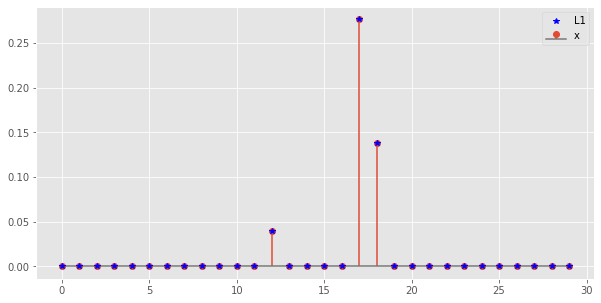

In [9]:
## L1 through linear programming
AA = np.concatenate((A,-A),axis=1)
c = np.ones((2*m,1))
res = opt.linprog(c,A_ub=-np.eye(2*m),b_ub=c*0,A_eq=AA,b_eq=b,options={"cholesky": False,'sym_pos':False})
x_l1 = res.x[0:m] - res.x[m:]

# plt.figure(figsize=(14,6))
# plt.subplot(1,2,1)
# x_hat = A.T.dot(np.linalg.inv(A.dot(A.T)).dot(b))
# plt.stem(x,use_line_collection=True,label='x')
# plt.plot(x_hat,'*g',label='L2')
# plt.legend()

plt.figure(figsize=(10,5))
# plt.subplot(1,2,2)
plt.stem(x,use_line_collection=True,label='x')
plt.plot(x_l1,'*b',label='L1')
plt.legend()
plt.show()


Finding the solution with minimal cardinality!

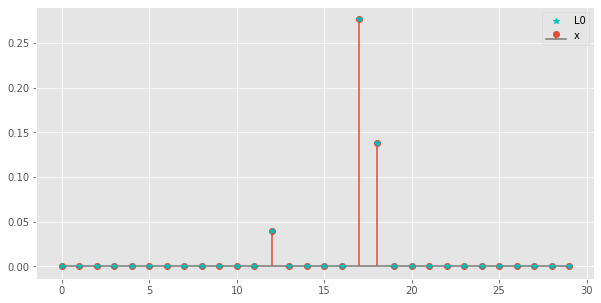

In [10]:
from sklearn.linear_model import OrthogonalMatchingPursuit
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=3)
omp.fit(A, b)
coef = omp.coef_

# plt.figure(figsize=(14,6))
# plt.subplot(1,2,1)
# x_hat = A.T.dot(np.linalg.inv(A.dot(A.T)).dot(b))
# plt.stem(x,use_line_collection=True,label='x')
# plt.plot(x_hat,'*g',label='L2')
# plt.legend()

plt.figure(figsize=(10,5))
# plt.subplot(1,2,2)
plt.stem(x,use_line_collection=True,label='x')
plt.plot(coef,'*c',label='L0')
plt.legend()
plt.show()